# Hypothesis test examples

## A/B testing

Testing if the difference is due to the change or random chance. Permutation is a good choice here because the result can be simulated as if the change had no effect on the difference. p-value is calculated and the null hypothesis is rejected based on it.

Low p-value implies that the change in strategy lead to a change in performance.

### The vote for the Civil Rights Act in 1964

In [3]:
import numpy as np
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    frac = sum(dems) / len(dems)
    return frac
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print("p-value =", p)

p-value = 0.0


So the result is significant. That means our hypothesis party of a House member has no bearing on his or her vote is rejected. By using permutated data over and over again, the value of original fraction is significant among them.

### A time-on-website analog

perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic.

So the hypothesis: The change in the rules has no impact.

In [4]:
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,1114,  813,  887])
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392, 73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583, 37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44, 288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54, 675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197, 136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226, 605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354, 778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403, 252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563, 206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693, 55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450, 578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351, 391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814, 603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156, 419,  239,  119,  129,  467])
nht_diff_obs = diff_of_means(nht_dead, nht_live)
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means,10000)
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance.

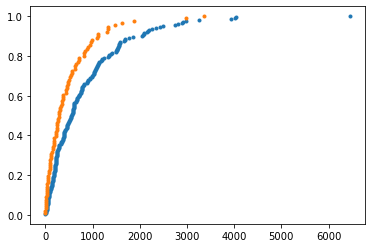

In [9]:
import matplotlib.pyplot as plt
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

live_x, live_y = ecdf(nht_live) 
dead_x, dead_y = ecdf(nht_dead)

plt.plot(live_x, live_y, marker=".", linestyle="none")
plt.plot(dead_x, dead_y, marker=".", linestyle="none")
plt.show()

## Test of correlation

To test the correlation one of the variables can be left fixed while the other permutated.

p-val = 0.0


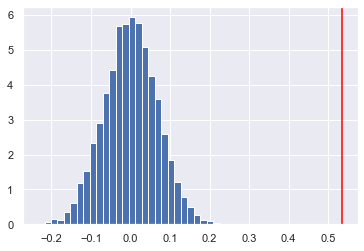

In [10]:
# from urllib.request import urlretrieve
# url = "https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv"
# data = urlretrieve(url, "states.csv")
import pandas as pd
import seaborn as sns
sns.set()
df = pd.read_csv("states.csv")
total_votes = df["total_votes"]
dem_share = df["dem_share"]
r_obs = np.corrcoef(total_votes, dem_share)[0,1]
perm_replicates = np.empty(10000)
for i in range(10000):
    total_votes_permuted = np.random.permutation(total_votes)
    perm_replicates[i] = np.corrcoef(total_votes_permuted, dem_share)[0,1]
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)
plt.hist(perm_replicates, bins=30, density=True)
plt.axvline(r_obs, color = "red")
plt.show()

### Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. The hypothesis needed to be tested. To do so, the illiteracy values are permuted but  the fertility values left fixed.

The null hypothesis is there is no correlation.

In [11]:
df = pd.read_csv("illiteracy.csv")
fertility = df["fertility"]
illiteracy = 100 - df["female literacy"]
r_obs = np.corrcoef(illiteracy, fertility)[0,1]
perm_replicates = np.empty(10000)
for i in range(10000):
    illiteracy_permuted = np.random.permutation(illiteracy)
    perm_replicates[i] = np.corrcoef(illiteracy_permuted, fertility)[0,1]
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print("p-val =", p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.



### Do neonicotinoid insecticides have unintended consequences?


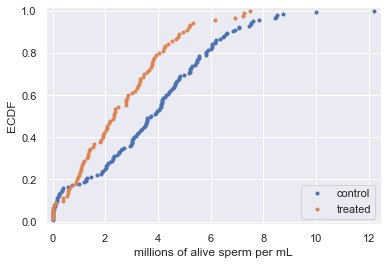

In [12]:
control = np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174, 6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148, 6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      , 4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   , 6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158, 6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172, 3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 , 3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892, 4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     , 0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 , 0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668, 2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 , 2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294, 2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478, 3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232, 8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282, 3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958, 6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628, 5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522, 4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      , 0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 , 5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148, 3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666, 0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      , 0.065   ])
treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966, 3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538, 2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836, 2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354, 3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 , 2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658, 0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964, 2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 , 4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602, 2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 , 1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804, 3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046, 2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962, 2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      , 3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)
plt.plot(x_control, y_control, marker=".", linestyle="none")
plt.plot(x_treated, y_treated, marker=".", linestyle="none")
plt.margins(0.02)
plt.legend(('control', 'treated'), loc='lower right')
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()



The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm.

### Bootstrap hypothesis test on bee sperm counts

Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees.

In [18]:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates
diff_means = np.mean(control) - np.mean(treated)
mean_count = np.mean(np.concatenate((control, treated)))
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size=10000)
bs_replicates = bs_reps_control - bs_reps_treated
p= np.sum(bs_replicates >= diff_means) / len(bs_replicates)
print("p-value =", p)

p-value = 0.0001
